<font color='green' size='6'>**Практическая работа 3**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  


**Ваша задача** — предсказать, останется ли клиент с аккаунтом или закроет его (например, уйдёт).

Требования к оформлению:
- Работа должна быть оформлена в jupyter notebook (файл *.ipynb)
- Работа должна содержать комментарии и выводы. Объясняйте почему вы выбрали именно этот способ обработки данных


Всем удачи!





# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [1]:
import pandas as pd

# <font color='#11a642' size='6'> **Загрузка данных**

In [2]:
# 1. Загрузка датасета
!gdown 1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO

Downloading...
From: https://drive.google.com/uc?id=1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO
To: /Users/antontravkin/Sites/python_rtk/part 2/Lesson 30 Промежуточная аттестация 2/train.csv
100%|██████████████████████████████████████| 12.4M/12.4M [00:11<00:00, 1.11MB/s]


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
# 2. Разделение признаков и целевой переменной
X = df.drop('Exited', axis=1)
y = df['Exited']

In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

# <font color='#11a642' size='6'> **Разведочный анализ данных(можно переиспользовать из ДЗ 9)**

In [7]:
import os

file_size_bytes = os.path.getsize('train.csv')
file_size_gb = file_size_bytes / (1024**3)
print(f"Размер файла train.csv: {file_size_gb:.4f} ГБ")

Размер файла train.csv: 0.0115 ГБ


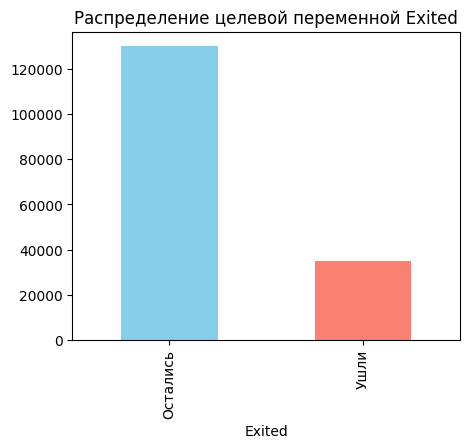

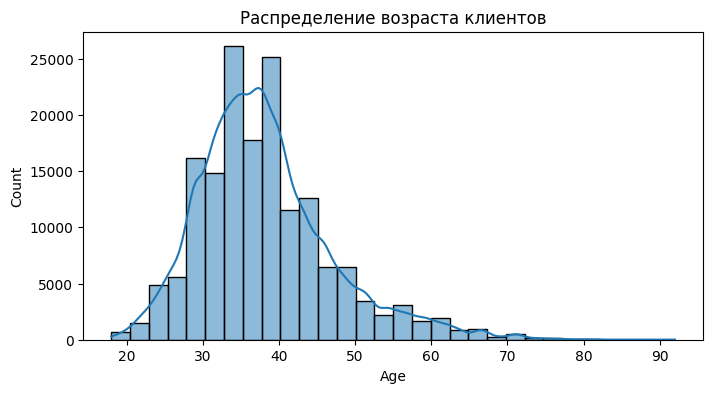

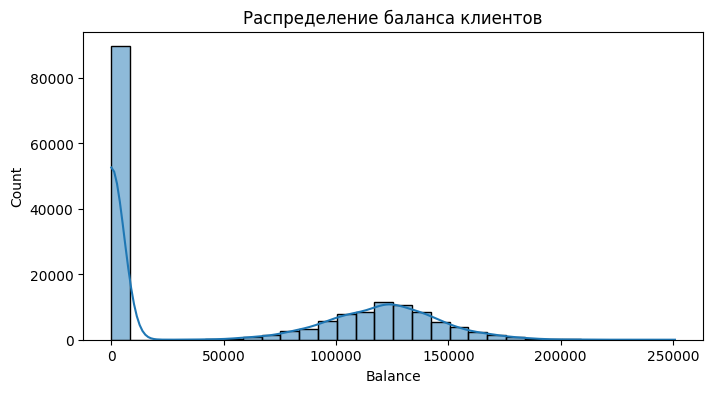

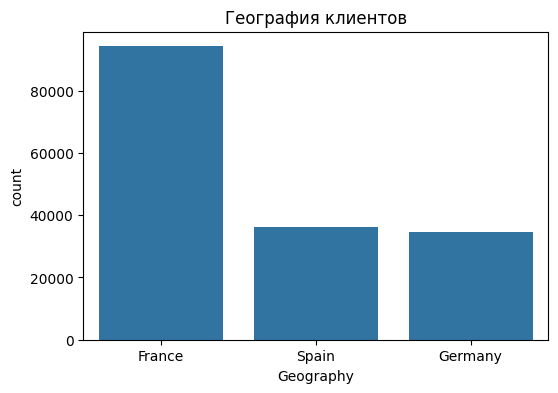

In [8]:
# ваши код
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализируем распределение целевой переменной
plt.figure(figsize=(5, 4))
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной Exited')
plt.xticks([0, 1], ['Остались', 'Ушли'])
plt.show()

# Визуализируем распределения признаков
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Распределение возраста клиентов')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Распределение баланса клиентов')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Geography')
plt.title('География клиентов')
plt.show()



# <font color='#11a642' size='6'> **Построение моделей с помощью pipeline + подбор гиперпараметров**

In [17]:
# ваши код

from sklearn.model_selection import train_test_split


# Подготовка данных
categorical_features = ['Geography', 'Gender']
numerical_features = [
    col for col in X.columns if col not in categorical_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# <font color='#11a642' size='6'> **Итерпретация результатов c помощью shap, permitation feature importance, сравнение с результатами из ДЗ 9**

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

/Users/antontravkin/Sites/python_rtk/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


=== Модель: RandomForest ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.72      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

Матрица ошибок:
[[24607  1416]
 [ 3264  3720]]




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 XGBClassifier(base_scor...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

=== Модель: XGBoost ===
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.74      0.55      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007

Матрица ошибок:
[[24654  1369]
 [ 3133  3851]]




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LGBMClassifier(random_state=42, verbose=-1))])

=== Модель: LightGBM ===
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.74      0.56      0.64      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007

Матрица ошибок:
[[24687  1336]
 [ 3082  3902]]




/Users/antontravkin/Sites/python_rtk/.venv/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


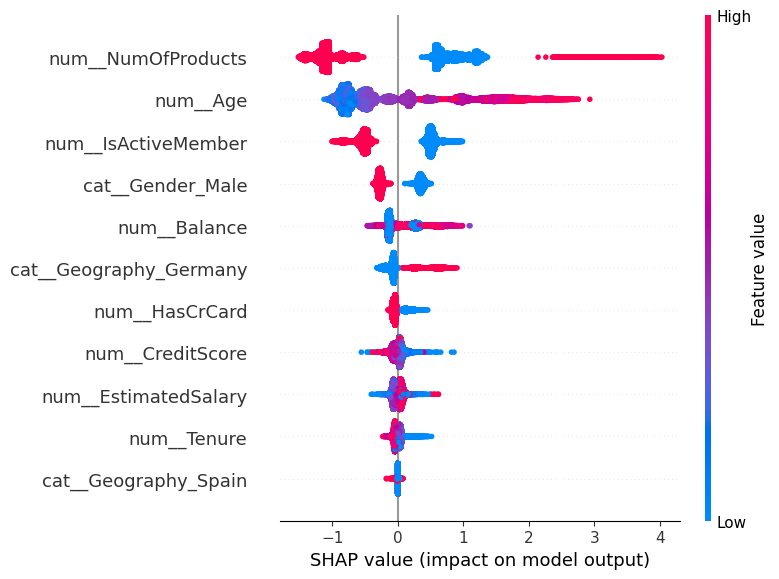

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import shap

# Препроцессор
numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('onehot', OneHotEncoder(drop='first'))])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Построение и сравнение моделей RandomForest, XGBoost, LightGBM
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1)
}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)

    # Получаем DataFrame с признаками после препроцессинга с именами колонок
    X_test_transformed = pipe.named_steps['preprocessor'].transform(X_test)
    feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
    X_test_transformed_df = pd.DataFrame(
        X_test_transformed, columns=feature_names)

    y_pred = pipe.named_steps['classifier'].predict(X_test_transformed_df)

    print(f'=== Модель: {name} ===')
    print(classification_report(y_test, y_pred))
    print('Матрица ошибок:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

# Интерпретация модели LightGBM с помощью SHAP (пример)
model = pipe.named_steps['classifier']

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_transformed_df)

# Для LightGBM 
if isinstance(shap_values, list):
    shap_values = shap_values[1]

shap.summary_plot(shap_values, X_test_transformed_df,
                  feature_names=feature_names)